# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [37]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv")
df.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [38]:
df.shape

(258000, 4)

Questions

1. Delete unnamed columns

In [40]:

#First i tried to print all the column names of present DataFrame with following code that i commented out

# for col in df.columns:
 #   print(col)


''''then i tried to print all the columns that i wish to keep from DataFrame with following code'''

# df.columns
# df1  = df.drop(["unnamed columns"],axis =1,inplace=True)
##### No data available for this column ################################# 



Index(['year', 'name', 'percent', 'sex'], dtype='object')

2. Show the distribution of male and female

C:\Users\AVITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


boy     129000
girl    129000
Name: sex, dtype: int64

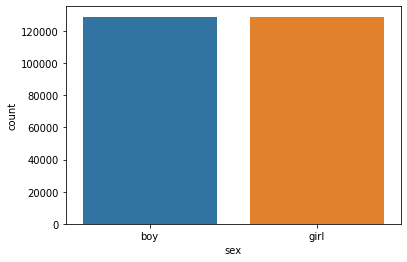

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot distributions
# sns.distplot(df['sex'], kde=True, rug=True,color="purple", bins=25)
sns.countplot(df['sex'])
df['sex'].value_counts()

3. Show the top 5 most preferred names

In [14]:
df.head(5)

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


4. What is the median name occurence in the dataset

In [15]:
# median_name = df.groupby('name').count.sum().median()
# (df.groupby('name').count.sum() == median_name).sum()
# (names.Count == names.count.median()).sum()

5. Distribution of male and female born count by states

In [16]:
df['sex'].value_counts()

boy     129000
girl    129000
Name: sex, dtype: int64

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


Text(0, 0.5, 'Min and max temperature')

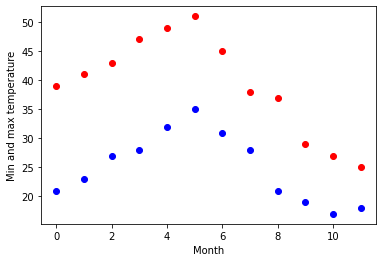

In [21]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max,'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [34]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [27, 52, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [17, 36, 0])

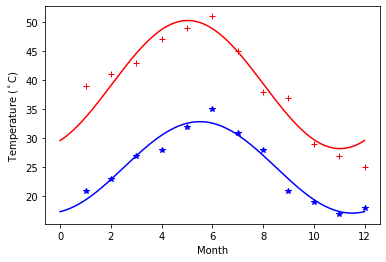

In [36]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'r+')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'b*')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
